# Tally β

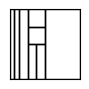

Bad


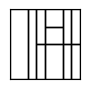

Bad


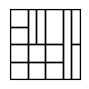

Bad


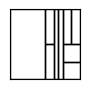

Bad


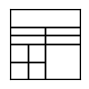

Bad


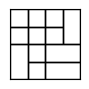

Bad


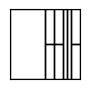

Bad


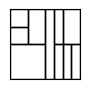

Bad


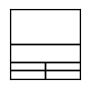

Bad


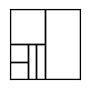

Good


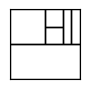

Good


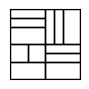

Good


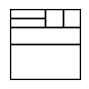

Good


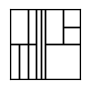

Good


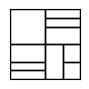

Good


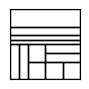

Good


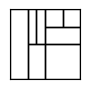

Good


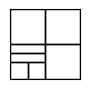

Good


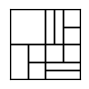

Good


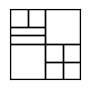

Good


In [1]:
from tally import Composition

import os

PATH, DATA = "data", {}

for label in os.listdir(PATH):
    if os.path.isfile(os.path.join(PATH, label)):
        continue  # Hidden file
    for filename in os.listdir(os.path.join(PATH, label)):
        if filename.split('.')[1] == "json":
            composition = Composition.load(os.path.join(PATH, label, filename))
            DATA[composition] = float(label)

for composition, value in DATA.items():
    composition.draw(figsize=(1, 1))
    print("Good" if value else "Bad")


In [2]:
from tally.functor import n_params, functor, evaluate

import warnings; warnings.filterwarnings("ignore")
from pytket.extensions.qiskit import AerBackend
from numpy.random import rand, seed; seed(42)
import numpy as np
import noisyopt

params0 = rand(n_params)
backend = AerBackend()
losses = []

def callback(params):
    losses.append(loss(params))
    print("Step {}: {}".format(len(losses), losses[-1]))

def loss(params):
    return np.mean(np.array([
        (value - evaluate(functor(params), composition, backend)) ** 2
        for composition, value in DATA.items()]))

experiment = noisyopt.minimizeSPSA(
    loss, params0, paired=False, callback=callback, niter=7)
experiment


Step 1: 0.2613051891326904
Step 2: 0.2662102699279785
Step 3: 0.26958508491516114
Step 4: 0.2754753589630127
Step 5: 0.2745941638946533
Step 6: 0.2673220634460449
Step 7: 0.27204074859619143


 message: terminated after reaching max number of iterations
 success: True
     fun: 0.2761341094970703
       x: [ 3.662e-01  9.758e-01  6.919e-01  5.915e-01  1.159e-01
            1.504e-01]
     nit: 7
    nfev: 14

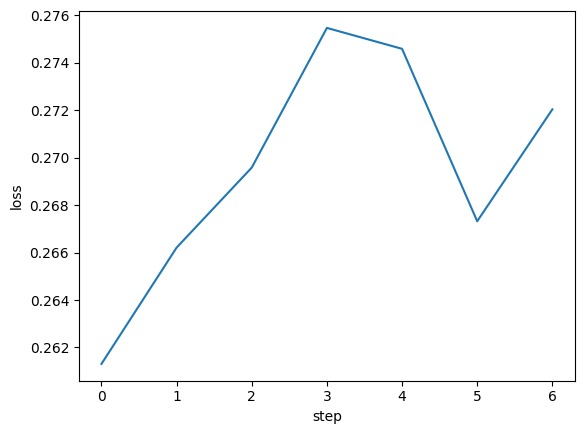

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(np.array(losses))
plt.xlabel('step')
plt.ylabel('loss')
plt.show()


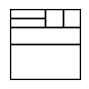

0.1884765625


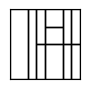

0.2392578125


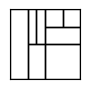

0.25


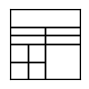

0.345703125


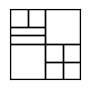

0.35546875


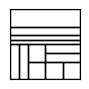

0.4384765625


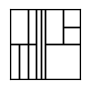

0.474609375


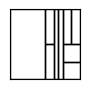

0.494140625


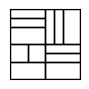

0.5078125


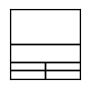

0.5107421875


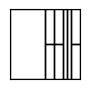

0.5185546875


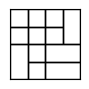

0.6083984375


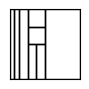

0.6484375


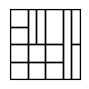

0.703125


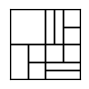

0.712890625


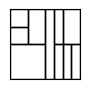

0.71484375


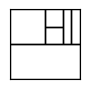

0.72265625


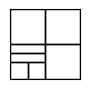

0.72265625


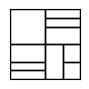

0.7646484375


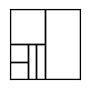

0.8271484375


In [6]:
F = functor(experiment.x)

scores = {c: evaluate(F, c, backend) for c in DATA}

for c in sorted(DATA, key=lambda c: scores[c]):
    c.draw(figsize=(1, 1))
    print(scores[c])
